In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


In [75]:
df=pd.read_csv('C:\\Users\\Acer\\Downloads\\Insurance Data.csv')

In [76]:
df.head()

,PatientID,Age,Gender,Body Mass Index,Blood Pressure,Diabetic,Children,Smoking,Region,Claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [77]:
df.rename(columns={'Body Mass Index': 'bmi'}, inplace=True)
df.rename(columns={'Blood Pressure': 'bp'}, inplace=True)

In [78]:
df.isnull().sum()

PatientID    0
Age          5
Gender       0
bmi          0
bp           0
Diabetic     0
Children     0
Smoking      0
Region       3
Claim        0
dtype: int64

In [79]:
df.dropna(subset=['Age', 'Region'],inplace=True)
df.isnull().sum()

PatientID    0
Age          0
Gender       0
bmi          0
bp           0
Diabetic     0
Children     0
Smoking      0
Region       0
Claim        0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  1332 non-null   int64  
 1   Age        1332 non-null   float64
 2   Gender     1332 non-null   object 
 3   bmi        1332 non-null   float64
 4   bp         1332 non-null   int64  
 5   Diabetic   1332 non-null   object 
 6   Children   1332 non-null   int64  
 7   Smoking    1332 non-null   object 
 8   Region     1332 non-null   object 
 9   Claim      1332 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 114.5+ KB


In [81]:
df['Age'] = df['Age'].astype(int)
df.Diabetic=df.Diabetic.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PatientID  1332 non-null   int64   
 1   Age        1332 non-null   int32   
 2   Gender     1332 non-null   object  
 3   bmi        1332 non-null   float64 
 4   bp         1332 non-null   int64   
 5   Diabetic   1332 non-null   category
 6   Children   1332 non-null   int64   
 7   Smoking    1332 non-null   object  
 8   Region     1332 non-null   object  
 9   Claim      1332 non-null   float64 
dtypes: category(1), float64(2), int32(1), int64(3), object(3)
memory usage: 100.3+ KB


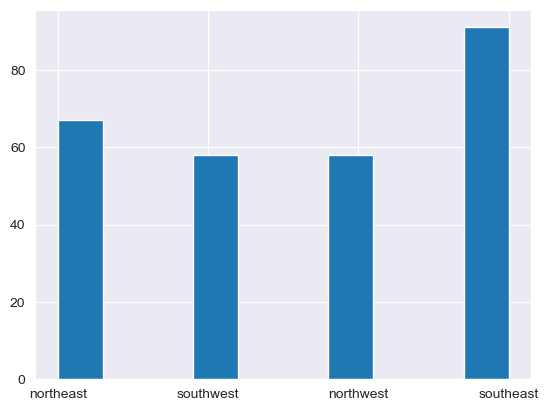

In [82]:
plt.hist(df[df.Smoking=='Yes'].Region)
plt.show()

<Axes: xlabel='Claim', ylabel='Count'>

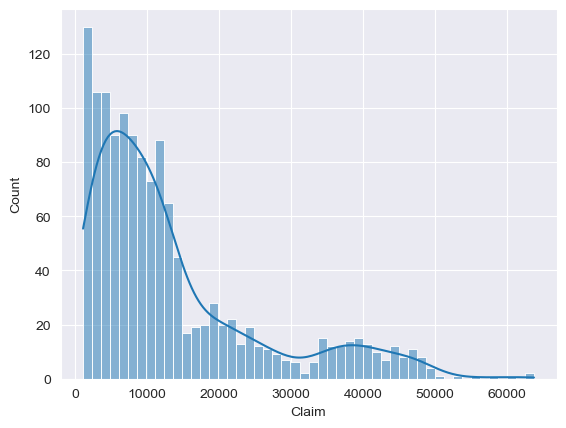

In [83]:
sns.set_style("darkgrid")
sns.histplot(data=df, x='Claim', bins=50 ,kde=True)

Text(0.5, 1.0, 'Gender Boxplot')

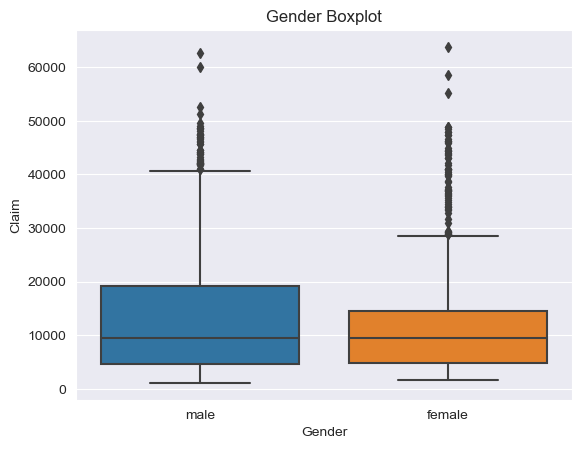

In [84]:
sns.boxplot(data=df, x='Gender', y='Claim')
plt.title('Gender Boxplot')

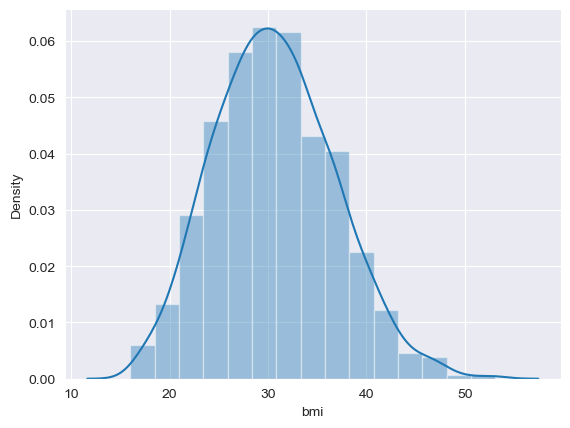

In [85]:
m2=sns.distplot(df.bmi,bins=15)


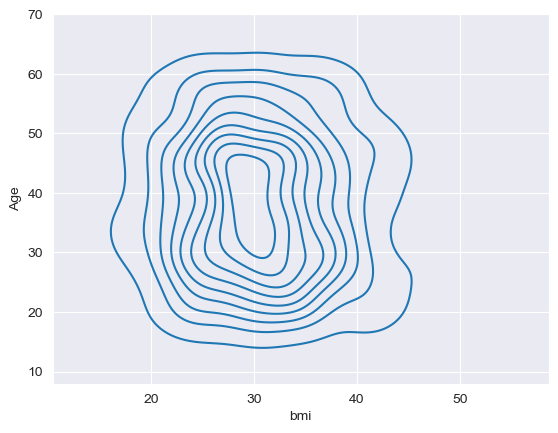

In [86]:
k1 = sns.kdeplot(data=df, x='bmi', y='Age')


In [87]:
df.Diabetic.cat.categories

Index(['No', 'Yes'], dtype='object')

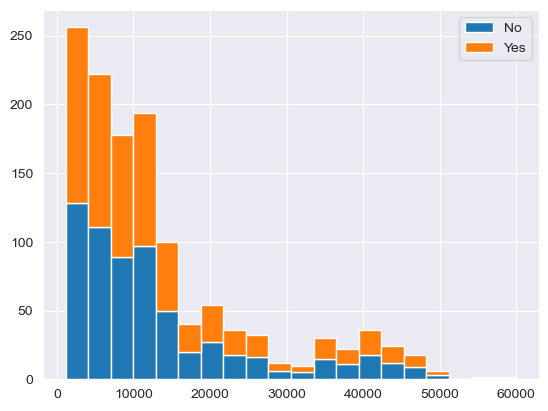

In [88]:
list1=list()
mylabels=list()
for dia in df.Diabetic.cat.categories:
    list1.append(df[df.Diabetic=='Yes'].Claim)
    mylabels.append(dia)
    
h=plt.hist(list1,bins=20,stacked=True,label=mylabels)
plt.legend()
plt.show()

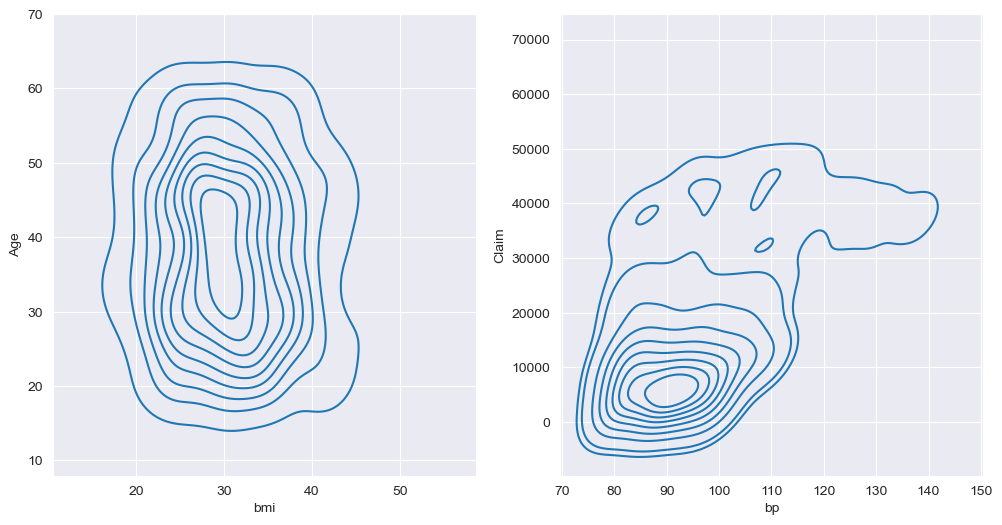

In [89]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))
k1 = sns.kdeplot(data=df, x='bmi', y='Age', ax=axes[0])
k2 = sns.kdeplot(data=df, x='bp', y='Claim', ax=axes[1])
plt.show()


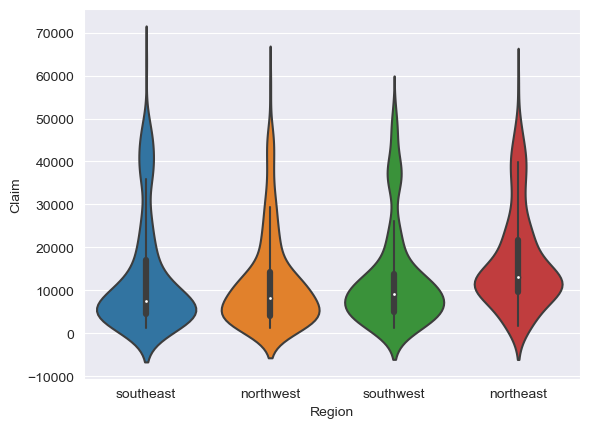

In [90]:
z=sns.violinplot(data=df, x='Region',y='Claim')

<Axes: xlabel='bmi', ylabel='Claim'>

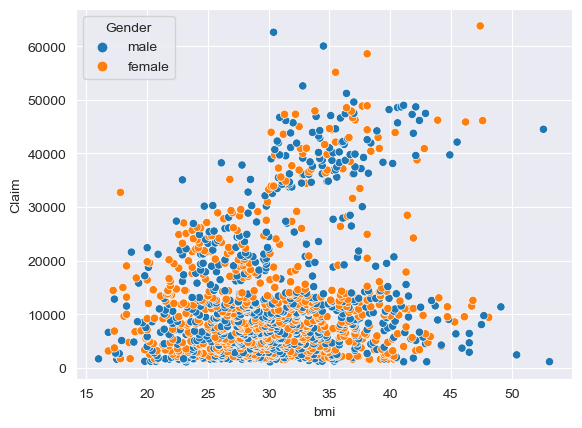

In [91]:
sns.scatterplot(data=df,x='bmi',y='Claim',hue='Gender')

<Axes: xlabel='Children', ylabel='Claim'>

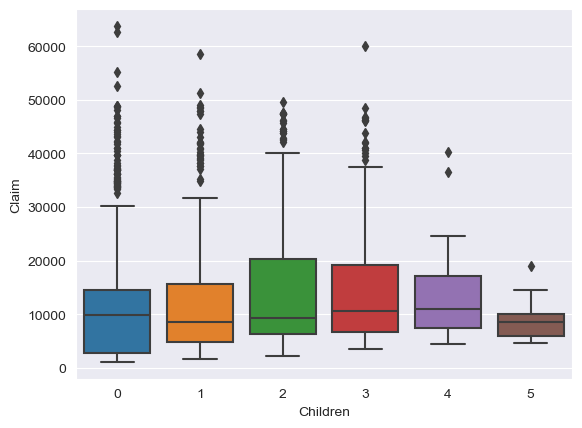

In [92]:
sns.boxplot(data=df,x='Children', y='Claim')

In [93]:
df.Smoking.value_counts()

Smoking
No     1058
Yes     274
Name: count, dtype: int64

<Axes: xlabel='Smoking', ylabel='Claim'>

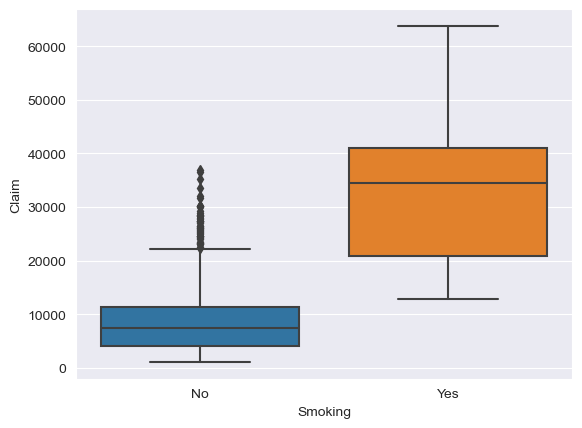

In [94]:
sns.boxplot(data=df, x = 'Smoking', y = 'Claim')

In [95]:
def bmi_est(column):
    if column<18.5:
        return 'underweight'
    elif (column>=18.5) & (column<=24.9):
        return 'healhty'
    elif (column>=25) &(column<=29.9):
        return 'overweight'
    else:
        return 'obese'

df['bmi_cat']=df['bmi'].apply(bmi_est)
df['bmi_cat'].value_counts()

bmi_cat
obese          702
overweight     387
healhty        223
underweight     20
Name: count, dtype: int64